# Curso Redes Neuronales y aprendizaje automático
###### Por: Dioney Alberto Contreras Sanchez


## ¿Qué son las redes neuronales?

Son algoritmos de aprendizaje automático inspirados en el modo de aprendizaje de los sistemas biológicos. Estos se caracterízan por tener capa de entrada, capa de salida y un número n de capas ocultas.

$$ \hat{y} = b + \sum_{i=1}^{n} w_{i} x_i + \epsilon $$

De la ecuación anterior se puede observar que la predicción es una suma ponderada de los pesos $w_i$ multiplicados por las características $x_{i}$ y sumados un valor de sesgo o bías $b$.


## Configuración de una red neuronal

Las redes neuronales están formadas por las neuronas de la **capa de entrada**  (a). Esta capa tiene tantas neuronas como características de entrada ingresarán al modelo.

Por otro lado, existen unos elementos conocidos como **capas ocultas** (*h*), las cuales son capas que realizan todo el cálculo de entrenamiento de las redes neuronales. Se les conoce como capas ocultas ya que tienen la lógica de procesamiento interno y de aprendizaje de la red neuronal.

Finalmente, existe la **capa de salida** (*Out*). En esta capa se define la salida del modelo luego de todo el procesamiento interno del algoritmo. Existen tantas neuronas como clases a predecir tenga el problema que queramos resolver.

En la siguiente figura se observa la estructura de una red neuronal simple con una sola capa oculta.

## 0.1 Funciones de activación

Las salidas de las neuronas pasan por funciones matemáticas conocidas como **Funciones de activación**. La finalidad de las funciones de activación es dotar de un efecto "No Lineal" a la salida de las neuronas dentro de la configuración.

Existen distintos tipos de funciones de activación entre las que se encuentran:
* ReLU (Rectificador Lineal Unitario)
* Sigmoide
* Funcion escalón
* Tangente Hiperbólica

Dentro de esta presentación usaremos la función Sigmoide que se define como:

$$ Sigmoid = \frac{1}{1+e^{-x}}  $$

$$ReLU = Max(0,X)  $$

$$Tanh = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}  $$

## 02. Construcción de una red neuronal

In [1]:
# Importamos las librerías necesarias para la ejecución del modelo

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets                                               # Biblioteca que contiene un conjunto de datos sinteticos
from sklearn.model_selection import train_test_split                       # Biblioteca para la separación de datos en conjunto de entrenamiento y prueba

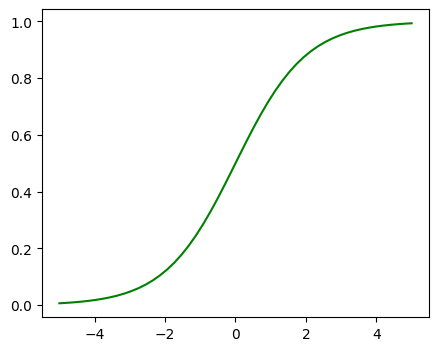

In [2]:
# Función Sigmoide

def sigmoid(x):
    return 1/(1 + np.exp(-x))

_x = np.linspace(-5, 5)

plt.figure(figsize = (5,4))

plt.plot(_x, sigmoid(_x), c = 'green')
plt.show()

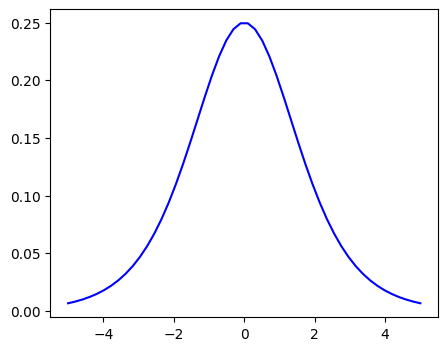

In [3]:
# Derivada de la función sigmoide

def dev_sig(x):
    return sigmoid(x)*(1-sigmoid(x))

plt.figure(figsize = (5,4))
plt.plot(_x, dev_sig(_x), c = 'blue')
plt.show()


### 03. Preparación de los datos

In [4]:
# Cargar el conjunto de datos
np.random.seed(0)

X, y = datasets.make_moons(2000, noise=0.2)

print('Vector de caracteristicas: \n', X.shape)
print('Clase: \n', y.shape)

Vector de caracteristicas: 
 (2000, 2)
Clase: 
 (2000,)


In [8]:
X

array([[ 0.379932  ,  0.83632188],
       [ 0.17987337, -0.23340971],
       [-0.05906195, -0.0820012 ],
       ...,
       [ 1.29421831, -0.24084761],
       [-0.06484229,  0.72449389],
       [-0.39030798,  1.22853356]])

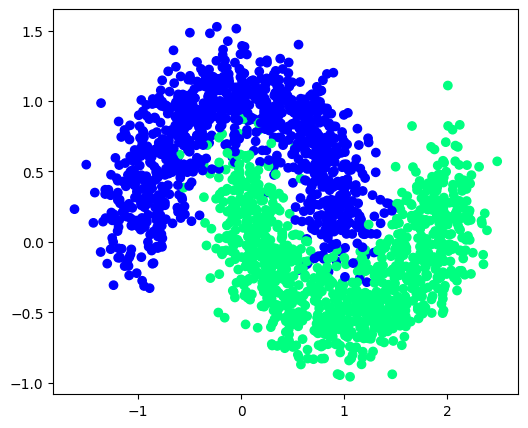

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.winter)

### Creación de los conjuntos de Entrenamiento y Prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)   # Se crea un conjunto de prueba del 20% de los datos

In [10]:
print(X_train.shape)
print(y_train.shape)

(1600, 2)
(1600,)


In [11]:
y_train = y_train.reshape(1, y_train.shape[0])  # Cambiamos el y_train a una forma (1, n)
X_train = X_train.T                             # Cambiamos el X_train a una forma (2, n)

print("Total de ejemplos para entrenamiento: ", X_train.shape[1])
print("Total de ejemplos para prueba: ", X_test.shape[0])

Total de ejemplos para entrenamiento:  1600
Total de ejemplos para prueba:  400


In [12]:
print(X_train.shape)
print(y_train.shape)

(2, 1600)
(1, 1600)


In [21]:
# Establecemos los hiperparámetros

error_cost = []                                    # Lista contenedora de los valores de la función de costo
h1 = 10                                            # Número de neuronas en la capa oculta
lr = 0.1                                           # Taza de aprendizaje para el descenso del gradiente
epocas = 40000                                     # Numero de veces a iterar

m = X_train.shape[1]                               # Numero de observaciones del conjunto de entrenamiento

# Inicialización de los pesos y sesgos
np.random.seed(10)

## Inicializando valores de capa oculta
w1 = np.random.rand(h1, X_train.shape[0])          # Pesos de la capa oculta
b1 = np.random.rand(h1, 1)                         # Sesgos de la capa oculta

## Inicializando valores de capa de salida
w2 = np.random.rand(y_train.shape[0], h1)           # Pesos de la capa de salida
b2 = np.random.rand(y_train.shape[0], 1)            # Sesgo de la capa de salida

print('W1 shape :{0:}'.format(w1.shape))
print('b1 shape :{0:}'.format(b1.shape))
print('W2 shape :{0:}'.format(w2.shape))
print('b2 shape :{0:}'.format(b2.shape))

W1 shape :(10, 2)
b1 shape :(10, 1)
W2 shape :(1, 10)
b2 shape :(1, 1)


###  La función de costo a utilizar es el Mean Squared Error (MSE) definido como:

$$ \frac{1}{m} \sum_{i=1}^m (y-\hat{y})^2$$

Para minimizar el costo, se utiliza una técnica conocida como **retropropagación** (*backpropagation*). Esta técnica consiste en encontrar la **derivada** de la función de costo en función al peso $w$ y el sesgo $b$. Esto con la finalidad de que el valor de la función de costo vaya disminuyendo a traves de cada época.

Sin embargo, estos parametros no pueden derivarse de manera directa, por lo que se utiliza la regla de la cadena. Entonces, derivando la función de costo con respecto a los pesos de la última capa, las derivadas parciales quedan de la siguiente manera:

        
### Fórmula para el cálculo del costo y sesgo de la capa de salida
        
$$ \frac{\partial{Co^{out}}}{\partial{w^{out}}} =
\frac{\partial z^{out}}{\partial w^{out}} \frac{\partial a^{out}}{\partial z^{out}}\frac{\partial a^{out}}{\partial Co^{out}} = a^{h} \sigma'(z^{out})\frac{2}{m}(a^{out} - y)$$


$$\frac{\partial{cost^{out}}}{\partial{b^{out}}} =  \frac{\partial z^{out}}{\partial b^{out}} \frac{\partial a^{out}}{\partial z^{out}}\frac{\partial a^{out}}{\partial Co^{out}} = \sigma'(z^{out})\frac{2}{m}(a^{out} - y) $$
        
### Fórmula para el cálculo del costo y sesgo de la capa oculta


$$ \frac{\partial{Co^{h}}}{\partial{w^{h}}} = \frac{\partial z^{h}}{\partial w^{h}} \frac{\partial a^{h}}{\partial z^{h}}\frac{\partial a^{h}}{\partial Co^{h}} = (\sigma'(z^{out})\frac{2}{m}(a^{out} - y) w^{out}) \sigma'(z^{h}) X^{input} $$
        
$$ \frac{\partial{cost^{h}}}{\partial{b^{h}}} =  \frac{\partial z^{h}}{\partial w^{h}} \frac{\partial a^{h}}{\partial z^{h}}\frac{\partial a^{h}}{\partial Co^{h}} = (\sigma'(z^{out})\frac{2}{m}(a^{out} - y) w^{out}) \sigma'(z^{h})$$
        
### Si se quiere buscar para más capas
      
$$ \frac{\partial{cost^{L}}}{\partial{w^{L}}} = \frac{\partial{cost^{L}}}{\partial{a^{L}}} \frac{\partial{a^{L}}}{\partial{z^{L}}} \frac{\partial{z^{L}}}{\partial{w^{L}}} $$

$$ \frac{\partial{cost^{L}}}{\partial{b^{L}}} = \frac{\partial{cost^{L}}}{\partial{a^{L}}} \frac{\partial{a^{L}}}{\partial{z^{L}}} \frac{\partial{z^{L}}}{\partial{b^{L}}} $$

## 04. Entrenamiento del modelo

In [22]:
for epoca in range (epocas):

  ### PROPAGACIÓN HACIA ADELANTE  (forward propagation)
  z1 = np.dot(w1, X_train) + b1       # (10, 2) x (2, 1600) = (10, 1600) + (10, 1) = (10, 1600)
  a1 = sigmoid(z1)                    # = (10, 1600)

  z2 = np.dot(w2, a1) + b2            # (1, 10) x (10, 1600) = (1, 1600) + (1) = (1, 1600)
  a2 = sigmoid(z2)                    # (1, 1600)


  ### CALCULO DEL ERROR
  # Función de costo
  if epoca % 200 == 0:
          #loss = -(1/y_train.shape[1]) * np.sum(y_train * np.log(a2) +  ((1-y_train)*np.log(1-a2)))
          loss = np.sum(np.power((a2 - y_train), 2))
          print('Valor de la función de costo: ', loss)
          error_cost.append(loss)


  ### RETROPROPAGACIÓN

  ### Cálculo de las derivadas parciales de la capa de salida

  dz2_dw2 = a1              ### Derivada de Z con respecto a W en la capa de salida
  da2_dz2 = dev_sig(z2)     ### Derivada de a con respecto a z en la capa de salida
  dCo_da2 = (a2 - y_train)  ### Derivada del costo con respecto a a

  dCo_dw2 = np.dot(da2_dz2*dCo_da2, dz2_dw2.T) * (2/m)
  dCo_db2 = np.sum(da2_dz2*dCo_da2, axis=1, keepdims=True) * (2/m)

  ### Cálculo de las derivadas parciales de la capa oculta

  # Se reutilizan dos términos los cuales son
  # dCo_da2, da2_dz2

  dCo_dz2 = dCo_da2 * da2_dz2
  dz2_da1 = w2
  dCo_da1 = np.dot(dCo_dz2.T, dz2_da1)   ### Derivada del costo con respecto "a" en la capa oculta
  da1_dz1 = dev_sig(z1)                  ### Derivada de "a" con respecto a "z" en la capa oculta
  dz1_dw1 = X_train                      ### Derivada de "z" con respecto a "w" en la capa oculta

  dCo_w1 = np.dot(da1_dz1 * dCo_da1.T, dz1_dw1.T) * (2/m)
  dCo_b1 = np.sum(da1_dz1 * dCo_da1.T, axis=1, keepdims=True) * (2/m)

  ### ACTUALIZACIÓN DE HIPERPARÁMETROS
  w1 -= lr * dCo_w1
  b1 -= lr * dCo_b1

  w2 -= lr * dCo_dw2
  b2 -= lr * dCo_db2


Valor de la función de costo:  762.5531020349218
Valor de la función de costo:  335.2854963005072
Valor de la función de costo:  268.3431270894216
Valor de la función de costo:  221.4109373752978
Valor de la función de costo:  196.6077483265937
Valor de la función de costo:  182.29573556430148
Valor de la función de costo:  172.9156438362877
Valor de la función de costo:  166.36874668246708
Valor de la función de costo:  161.72178118041518
Valor de la función de costo:  158.42679673425516
Valor de la función de costo:  156.09524526838317
Valor de la función de costo:  154.43966398253133
Valor de la función de costo:  153.2530198909588
Valor de la función de costo:  152.3912674114614
Valor de la función de costo:  151.75622077438322
Valor de la función de costo:  151.28127243123959
Valor de la función de costo:  150.92094992815302
Valor de la función de costo:  150.64382477920753
Valor de la función de costo:  150.4278549642899
Valor de la función de costo:  150.25735049375677
Valor de 

### Graficando la función de costo

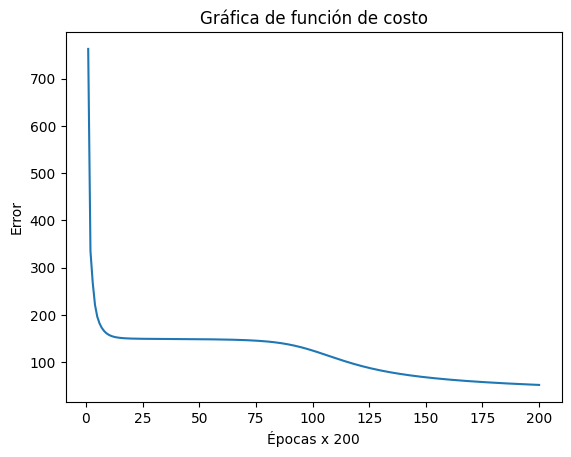

In [23]:
len_e = len(error_cost)
_x = np.linspace(1, len_e, len_e)

plt.plot(_x, error_cost)
plt.title('Gráfica de función de costo')
plt.ylabel('Error')
plt.xlabel('Épocas x 200')
plt.show()

### Generar predicciones en el conjunto de prueba

In [24]:
# Revisamos las dimensiones del conjunto de prueba

X_test_t = X_test.T
X_test_t.shape

(2, 400)

In [25]:
## Generamos las predicciones sobre el conjunto de prueba con los hiperparámetros obtenidos

z1 = np.dot(w1, X_test_t) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
out = sigmoid(z2)
out = out.reshape(out.shape[1])

In [26]:
# Generamos una condición en la cual, aquellos elementos que pasen un threshold
# del 50%, pasa a ser de la clase 1, de lo contrario, la clase 0.

y_hat = []
for i in (out):
    if i >= 0.5:
        y_hat.append(1)
    else:
        y_hat.append(0)

y_hat = np.array(y_hat)
y_hat = y_hat.reshape(y_hat.shape[0])

y_test = y_test.reshape(y_test.shape[0])    # 1, y_test.shape[0]

In [27]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

print("Accuracy: ", accuracy_score(y_test, y_hat))
print("F1-Score: ", f1_score(y_test, y_hat, average='binary'))
print("Recall: ", recall_score(y_test, y_hat))
print("Precision: ", precision_score(y_test, y_hat))


Accuracy:  0.9625
F1-Score:  0.9640287769784173
Recall:  0.9571428571428572
Precision:  0.9710144927536232


## 05. Red Neuronal con Scikit Learn

Scickit learn es una paquetería de Python para el desarrollo de modelos de Machine Learning.

Esta biblioteca está disponible para su uso mediante Python y tiene muchos complementos para el desarrollo de  y Redes Neuronales.

In [28]:
def get_metrics(predicted_values, true_values):

  print("Accuracy: ", accuracy_score(true_values, predicted_values))
  print("Valor F1: ", f1_score(true_values, predicted_values, average='binary'))
  print("Precision: ", recall_score(true_values, predicted_values))
  print("Recall: ", precision_score(true_values, predicted_values))

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
# Definimos la estructura de la red neuronal
nn_clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10, ), random_state=42)

# Ajustamos la red neuronal
nn_clf.fit(X_train.T, y_train.T)

# Generamos predicciones en el conjunto de prueba
predictions = nn_clf.predict(X_test)

# Obtenemos las métricas de evaluación
get_metrics(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.89
Valor F1:  0.8942307692307693
Precision:  0.8857142857142857
Recall:  0.9029126213592233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Tuneo de Hiperparámetros

In [32]:
## Generamos una rejilla con los parametros que queremos utilizar
param_grid = {'hidden_layer_sizes':[(10,),(20,),(30)],
              'activation':['relu', 'tanh', 'sigmoid'],
              'alpha':[1e-2, 1e-5, 1e-6, 1e-7]}

# Declaramos el modelo
model = MLPClassifier(random_state=42)

# Utilizamos el Grid Search con Cross Validation
grid_search = GridSearchCV(model, param_grid, cv = 5)

# Ajustamos el modelo
grid_search.fit(X_train.T, y_train.T)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'alpha': [0.01, 1e-05, 1e-06, 1e-07],
                         'hidden_layer_sizes': [(10,), (20,), 30]})

In [33]:
# Obtenemos los mejores parámetros para el modelo
hyper_model = grid_search.best_estimator_
grid_search.best_params_

{'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': 30}

In [34]:
# Realizamos predicciones con el nuevo modelo
hyper_predictions = hyper_model.predict(X_test)

In [35]:
# Obtenemos las métricas del nuevo modelo
get_metrics(hyper_predictions, y_test)

Accuracy:  0.9425
Valor F1:  0.945107398568019
Precision:  0.9428571428571428
Recall:  0.9473684210526315


## Frontera de decisión

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Función para graficar la frontera de decisión

def plot_decision_boundary(X, y, model, scaler):
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Escalar la malla
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

    # Hacer predicciones en la malla
    Z = model.predict(mesh_scaled)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


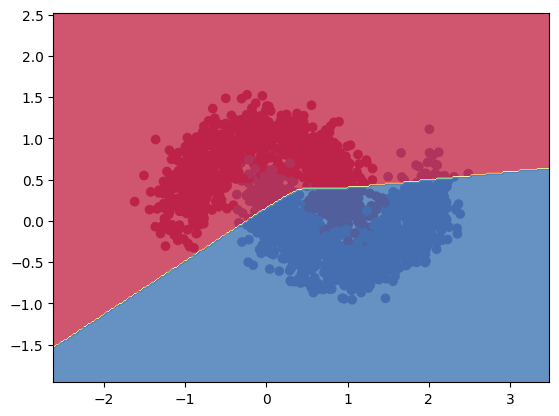

In [41]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definimos la estructura de la red neuronal
nn = MLPClassifier(activation='relu', alpha=1e-05, hidden_layer_sizes=(10, ), random_state=42)

# Ajustamos la red neuronal
nn.fit(X_train, y_train)

# Graficar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Graficar la frontera de decisión de la red neuronal
plot_decision_boundary(X, y, nn, scaler)